In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Ensure a clean TensorFlow session
tf.keras.backend.clear_session()

# Step 2: Simplified U-Net for Edge Tracing
def edge_tracing_unet(input_size=(256, 256, 1)):
    """
    Build a U-Net model for edge tracing.

    Args:
        input_size (tuple): Input image size.

    Returns:
        Model: Compiled U-Net model.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

# Example: Use the images and masks directly without the need to load from directories
# Assuming `images` and `masks` are numpy arrays with shapes (num_samples, 256, 256, 1)

# Step 3: Data Augmentation and Model Training
train_datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    zoom_range=0.2,          # Random zoom
    shear_range=0.1,         # Shear transformation
    horizontal_flip=True,    # Horizontal flip
    fill_mode='nearest'      # Fill empty pixels
)

# Use data augmentation to expand the dataset
train_generator = train_datagen.flow(
    images, 
    masks, 
    batch_size=1  # Batch size of 1 since we are working with one image
)

# Build and compile the model
model = edge_tracing_unet()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(
    train_generator, 
    epochs=50,  # Train for more epochs as we are using augmented data
    steps_per_epoch=100,  # Generate 100 augmented samples per epoch
    validation_data=(images, masks)  # Validate on the same images
)

# Step 4: Visualize Training Results
loss, accuracy = model.evaluate(images, masks)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")

# Visualize the predicted mask for the same input
predicted_mask = model.predict(images)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0].squeeze(), cmap='gray')
plt.title("Predicted Edge Mask")
plt.tight_layout()
plt.show()


Epoch 1/50


c:\Users\VIRAJ GURBADE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 1.5259e-04 - loss: 0.6917 - val_accuracy: 1.9836e-04 - val_loss: 0.6850
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6873 - val_accuracy: 1.9836e-04 - val_loss: 0.6781
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6769 - val_accuracy: 1.9836e-04 - val_loss: 0.6691
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6695 - val_accuracy: 1.9836e-04 - val_loss: 0.6559
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6606 - val_accuracy: 1.9836e-04 - val_loss: 0.6359
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6388 - val_accuracy: 1.9836e-04 - val_loss: 0.6771
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6712 - val_accuracy: 1.9836e-04 - val_loss: 0.6317
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

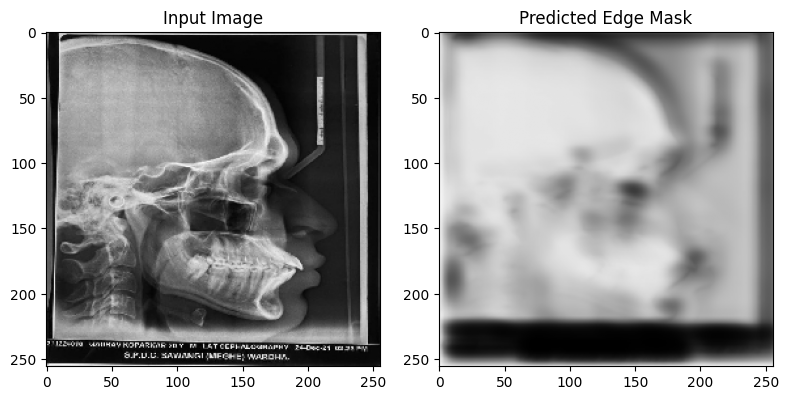

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt

# Ensure a clean TensorFlow session
tf.keras.backend.clear_session()

# Step 2: Simplified U-Net for Edge Tracing
def edge_tracing_unet(input_size=(256, 256, 1)):
    """
    Build a U-Net model for edge tracing.

    Args:
        input_size (tuple): Input image size.

    Returns:
        Model: Compiled U-Net model.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

# Load the input image and corresponding mask (training image and mask)
input_image_path = r"D:/COLLEGE/Projects/AI-Driven Cephalometric Analysis/Percision Smile/Data_sets/p2 gaurav2.jpeg"
mask_image_path = r"D:/COLLEGE/Projects/AI-Driven Cephalometric Analysis/Percision Smile/Tracesing_datasets/p44PratikPusam2.jpg"

def load_and_process_image(image_path):
    """
    Load and preprocess image by resizing to 256x256 and converting to grayscale.
    
    Args:
        image_path (str): Path to the image file.
    
    Returns:
        numpy array: Processed image.
    """
    img = load_img(image_path, target_size=(256, 256), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    return img_array

# Load the images and masks
input_image = load_and_process_image(input_image_path)
mask_image = load_and_process_image(mask_image_path)

# Convert images to 4D array (batch size, height, width, channels)
X_train = np.expand_dims(input_image, axis=0)  # Add batch dimension
y_train = np.expand_dims(mask_image, axis=0)   # Add batch dimension

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    zoom_range=0.2,          # Random zoom
    shear_range=0.1,         # Shear transformation
    horizontal_flip=True,    # Horizontal flip
    fill_mode='nearest'      # Fill empty pixels
)

# Use data augmentation to expand the dataset
train_generator = train_datagen.flow(
    X_train, 
    y_train, 
    batch_size=1  # Batch size of 1 since we are working with one image
)

# Build and compile the model
model = edge_tracing_unet()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(
    train_generator, 
    epochs=50,  # Train for more epochs as we are using augmented data
    steps_per_epoch=100,  # Generate 100 augmented samples per epoch
    validation_data=(X_train, y_train)  # Validate on the same images
)

# Step 4: Visualize Training Results
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")

# Visualize the predicted mask for the same input
predicted_mask = model.predict(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0].squeeze(), cmap='gray')
plt.title("Predicted Edge Mask")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Ensure a clean TensorFlow session
tf.keras.backend.clear_session()

# Step 2: Simplified U-Net for Edge Tracing
def edge_tracing_unet(input_size=(256, 256, 1)):
    """
    Build a U-Net model for edge tracing.

    Args:
        input_size (tuple): Input image size.

    Returns:
        Model: Compiled U-Net model.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

# Load the input image and corresponding mask dataset
input_image_path = r"D:\COLLEGE\Projects\AI-Driven Cephalometric Analysis\Percision Smile\Data_sets\p2 gaurav2.jpeg"
mask_image_path = r"D:\COLLEGE\Projects\AI-Driven Cephalometric Analysis\Percision Smile\Tracesing_datasets"

def load_and_process_image(image_path):
    """
    Load and preprocess image by resizing to 256x256 and converting to grayscale.
    
    Args:
        image_path (str): Path to the image file.
    
    Returns:
        numpy array: Processed image.
    """
    img = load_img(image_path, target_size=(256, 256), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    return img_array


def load_and_process_images_from_directory(directory_path):
    """
    Load and preprocess all images from a directory by resizing to 256x256 
    and converting to grayscale.
    
    Args:
        directory_path (str): Path to the directory containing images.
    
    Returns:
        numpy array: Array of processed images.
    """
    image_list = []
    
    for filename in os.listdir(directory_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            image_path = os.path.join(directory_path, filename)
            img = load_img(image_path, target_size=(256, 256), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0
            image_list.append(img_array)
    
    return np.array(image_list)

# Load the images and masks
input_image = load_and_process_image(input_image_path)
mask_images = load_and_process_images_from_directory(mask_image_path)

# Ensure the input image has the same number of samples as the mask images
X_train = np.repeat(np.expand_dims(input_image, axis=0), mask_images.shape[0], axis=0)  # Repeat input image

# Convert images to 4D arrays (batch size, height, width, channels)
X_train = X_train[..., np.newaxis]  # Add channel dimension
y_train = mask_images[..., np.newaxis]  # Add channel dimension

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    zoom_range=0.2,          # Random zoom
    shear_range=0.1,         # Shear transformation
    horizontal_flip=True,    # Horizontal flip
    fill_mode='nearest'      # Fill empty pixels
)

# Use data augmentation to expand the dataset
train_generator = train_datagen.flow(
    X_train, 
    y_train, 
    batch_size=1  # Batch size of 1 since we are working with one image
)

# Build and compile the model
model = edge_tracing_unet()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(
    train_generator, 
    epochs=50,  # Train for more epochs as we are using augmented data
    steps_per_epoch=100,  # Generate 100 augmented samples per epoch
    validation_data=(X_train, y_train)  # Validate on the same images
)

# Step 4: Visualize Training Results
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")

# Visualize the predicted mask for the same input
predicted_mask = model.predict(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0].squeeze(), cmap='gray')
plt.title("Predicted Edge Mask")
plt.tight_layout()
plt.show()
